In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
 # Loading the dataset in TensorFlow (keras)
# Later you can explore and play with other datasets with come with TensorFlow (Keras)
from tensorflow.keras.datasets import mnist

# Loading the train and test data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

This digit is:  3


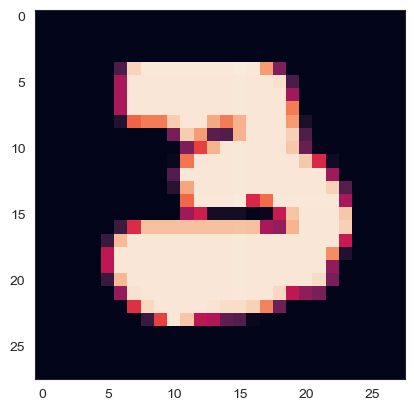

In [3]:
 # We can see that the training set consists of 60,000 images of size 28x28 pixels
i = np.random.randint(0, X_train.shape[0])
sns.set_style("white")
plt.imshow(X_train[i])
sns.set_theme(style="darkgrid")
print("This digit is: ", y_train[i])

In [4]:
def place_image_on_canvas(image, width=1200, height=1200):
    """
    Place a single MNIST image at a random location on a blank canvas of given dimensions.
    """
    # Create a blank canvas
    canvas = np.zeros((height, width))

    # Image dimensions
    img_height, img_width = image.shape

    # Ensure the image fits: choose random coordinates for the top-left corner
    max_x, max_y = width - img_width, height - img_height
    x, y = np.random.randint(0, max_x), np.random.randint(0, max_y)

    # Place the image on the canvas
    canvas[y:y+img_height, x:x+img_width] = image

    return canvas, (x, y)

def show_random_images_on_canvases(n_images):
    """
    Show n_images of MNIST placed randomly on individual 1200x1200 canvases.
    """
    for _ in range(n_images):
        # Randomly choose an image
        idx = np.random.randint(0, X_train.shape[0])
        image = X_train[idx]

        # Create a canvas with the image placed randomly
        canvas = place_image_on_canvas(image, width=128, height=128)

        # Display the canvas
        plt.figure(figsize=(5, 5))
        plt.imshow(canvas, cmap='gray')
        plt.axis('off')
        plt.show()

x, y =  52 18


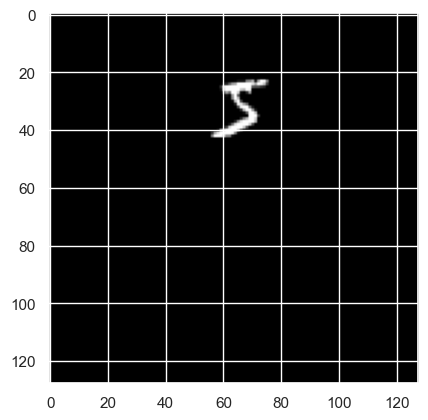

In [9]:
image = X_train[0]
coord_image, (x, y) = place_image_on_canvas(image, width=128, height=128)
print("x, y = ", x, y)
plt.imshow(coord_image, cmap='gray')
plt.show()

In [5]:
def create_dataset(list_img, n_images=100):
    """
    Create a dataset of n_images of MNIST placed randomly on individual 1200x1200 canvases.
    """
    X = []
    #y = []
    coords_x = []
    coords_y = []
    for i in range(n_images):
        # Randomly choose an image
        image = list_img[i]

        # Create a canvas with the image placed randomly
        canvas, (x, y) = place_image_on_canvas(image, width=128, height=128)
        canvas_norm = canvas / 255
        flat_canvas = canvas_norm.flatten()
        # Add the canvas to the dataset
        X.append(flat_canvas)
        coords_x.append(x)
        coords_y.append(y)
        #y.append(y_train[idx])
    
    X = np.array(X)
    #y = np.array(y)

    return X, coords_x, coords_y

In [6]:
X_train_canvas, coords_x, coords_y = create_dataset(X_train, n_images=X_train.shape[0])
X_test_canvas, coords_x_test, coords_y_test = create_dataset(X_test, n_images=X_test.shape[0])

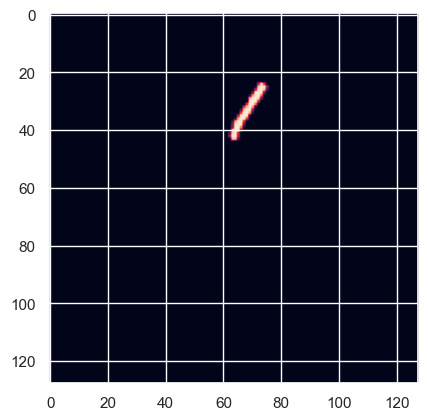

In [7]:
plt.imshow(X_train_canvas[23].reshape(128, 128))

In [8]:
from tensorflow.keras import utils

y_train_onehot = utils.to_categorical(y_train, num_classes=10)
y_test_onehot = utils.to_categorical(y_test, num_classes=10)

In [9]:
y_train_onehot[0].shape

(10,)

In [15]:
%load_ext tensorboard

In [16]:
 # Building the tensorflow model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard



def mnist_model():
    model = Sequential()

    model.add(Dense(4096, input_shape=(128 * 128,), activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
    )
    return model


#model = mnist_model()

#model_run = model.fit(X_train_prep, y_train_onehot, epochs=20, batch_size=512)

In [19]:
rmdir /s /q logs

c:\Users\aless\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.1434 - loss: 2.2754 - val_accuracy: 0.1752 - val_loss: 2.1991
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.1962 - loss: 2.1396 - val_accuracy: 0.2131 - val_loss: 2.0870
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.2370 - loss: 2.0156 - val_accuracy: 0.2300 - val_loss: 2.0785
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.2675 - loss: 1.9273 - val_accuracy: 0.2438 - val_loss: 2.0367
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.3135 - loss: 1.7940 - val_accuracy: 0.3020 - val_loss: 1.9078
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.3839 - loss: 1.6005 - val_accuracy: 0.3248 - val_loss: 1.8801
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.4894 - loss: 1.3372 - val_accuracy: 0.4295 - val_loss: 1.6805
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.6065 - loss: 1.0481 - val_accu

c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0, 0.5, 'accuracy')

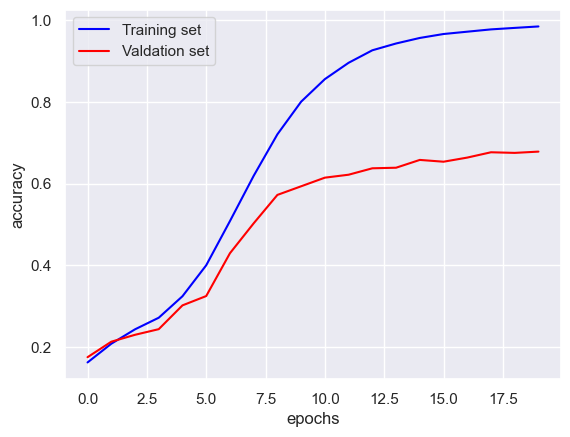

In [22]:
log_dir = "logs"
tensorboard_callback = TensorBoard(log_dir=log_dir)

num_epochs = 20
model = mnist_model()
model_run = model.fit(
    X_train_canvas,
    y_train_onehot,
    epochs=num_epochs,
    batch_size=512,
    validation_data=(X_test_canvas, y_test_onehot),
    callbacks=[tensorboard_callback],
)
# Evaluating the model on test dataset
# print("The [loss, accuracy] on test dataset are: " , model.evaluate(X_test_prep, y_test_onehot))
history_model = model_run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(
    x=model_run.epoch, y=history_model["accuracy"], color="blue", label="Training set"
)
sns.lineplot(
    x=model_run.epoch,
    y=history_model["val_accuracy"],
    color="red",
    label="Valdation set",
)
plt.xlabel("epochs")
plt.ylabel("accuracy")